#Partie 1 - SQL

##Exercice SQL - Durée : 25 min

Vous disposez d'une base de données relationnelle modélisant l'activité d'un site de e-commerce. Cette base est composée de 5 tables :
- Categories : les catégories de produits proposés
- Produits : les produits disponibles à la vente  
- Clients : les clients inscrits sur le site
- Commandes : les commandes passées par les clients
- Details_Commandes : le détail des produits achetés dans chaque commande

Votre mission consiste à écrire des requêtes SQL pour extraire différentes informations de cette base de données. Les questions abordent des aspects variés de SQL : de la simple sélection à des requêtes plus complexes impliquant plusieurs jointures et des agrégations.

Pour chaque question, une description de la sortie attendue vous est fournie, ainsi qu'un extrait du résultat que vous devriez obtenir.



In [1]:
#Exécuter cette cellule SANS RIEN CHANGER
#Cela va permettre de charger la base de données
import requests
import sqlite3
import pandas as pd
import io

url = 'https://sc-e.fr/magasin_tables.sql'
r = requests.get(url)

conn = sqlite3.connect('magasin.db')

conn.executescript(r.text)

def SQL(script):
    return pd.read_sql(script, conn)


Voici la description des relations ainsi que le schéma des tables ⁉

Relation entre Categories et Produits :
- Chaque produit appartient à une catégorie.
- La clé étrangère categorie_id dans la table Produits fait référence à la clé primaire categorie_id de la table Categories.
- C'est une relation "one-to-many" (un-à-plusieurs) : une catégorie peut contenir plusieurs produits, mais un produit n'appartient qu'à une seule catégorie.

Relation entre Clients et Commandes :
- Chaque commande est passée par un client.
- La clé étrangère client_id dans la table Commandes fait référence à la clé primaire client_id de la table Clients.
- C'est une relation "one-to-many" : un client peut passer plusieurs commandes, mais une commande n'est passée que par un seul client.

Relation entre Commandes et Details_Commandes :
- Chaque commande est composée d'un ou plusieurs détails (lignes de commande).
- La clé étrangère commande_id dans la table Details_Commandes fait référence à la clé primaire commande_id de la table Commandes.
- C'est une relation "one-to-many" : une commande peut avoir plusieurs détails, mais un détail n'appartient qu'à une seule commande.

Relation entre Produits et Details_Commandes :
- Chaque détail de commande concerne un produit.
- La clé étrangère produit_id dans la table Details_Commandes fait référence à la clé primaire produit_id de la table Produits.
- C'est une relation "one-to-many" : un produit peut apparaître dans plusieurs détails de commande, mais un détail de commande ne concerne qu'un seul produit.

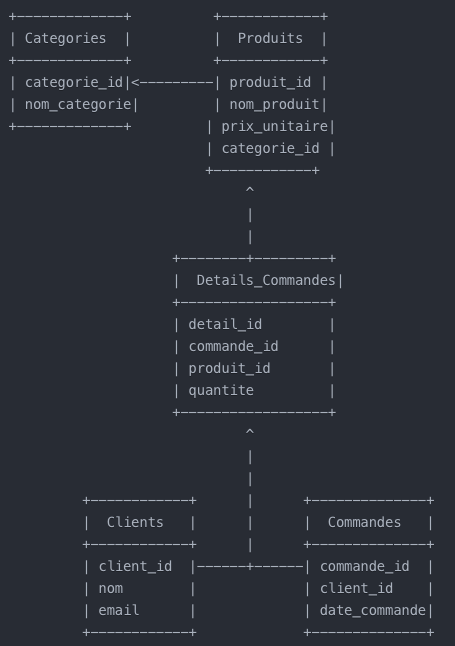

Pour chaque questions, il vous est demandé de mettre votre requête à la place de "METTRE VOTRE REQUÊTE ICI" sans rien changer au reste de la cellule, par exemple, pour afficher la table Categories vous entrerez :

    script_sql = """
    SELECT * FROM Categories;
    """
    df = SQL(script_sql)
    display(df)


##Questions

###1) Afficher pour chaque commande : son numéro, sa date, le nom du client, le total de la commande

commande_id | date_commande | nom          | total_commande  
------------|---------------|--------------|---------------
1           | 2023-03-15    | Jean Dupont  | 1049.97
2           | 2023-03-16    | Marie Martin | 69.98
3           | 2023-03-18    | Jean Dupont  | 599.99
...


In [9]:
script_sql = """
SELECT
    dc.commande_id,
    co.date_commande,
    cl.nom,
    SUM(dc.quantite * p.prix_unitaire) as total_commande
FROM
    commandes co
JOIN clients cl ON cl.client_id = co.client_id
JOIN details_commandes dc ON dc.commande_id = co.commande_id
JOIN produits p ON p.produit_id = dc.produit_id
GROUP BY
    dc.commande_id,
    co.date_commande,
    cl.nom;

"""
df = SQL(script_sql)
display(df)

,commande_id,date_commande,nom,total_commande
0,1,2023-03-15,Jean Dupont,1049.97
1,2,2023-03-16,Marie Martin,69.98
2,3,2023-03-18,Jean Dupont,599.99
3,4,2023-03-19,Pierre Durand,114.95
4,5,2023-03-20,Sophie Leroy,874.98
5,6,2023-03-22,Marie Martin,59.98
6,7,2023-03-23,Paul Moreau,429.97
7,8,2023-03-25,Lucie Dubois,124.98
8,9,2023-03-26,Marc Lefebvre,89.97
9,10,2023-03-28,Julie Roux,189.95


###2) Afficher les 3 produits les plus vendus avec leur quantité totale vendue, leur chiffre d'affaires total et leur catégorie, en excluant la catégorie 'Livres'

nom_produit    | quantite_vendue | chiffre_affaires | nom_categorie  
---------------|-----------------|------------------|---------------
T-shirt        | 8              | 199.92           | Vêtements
Souris         | 7               | 209.93           | Electronique
Short        | 5               | 149.95           | Vêtements

In [8]:
script_sql = """
SELECT
    p.nom_produit,
    SUM(dc.quantite) as quantite_vendue,
    SUM(dc.quantite * p.prix_unitaire) as chiffre_affaires,
    ct.nom_categorie
FROM
    commandes co
JOIN clients cl ON cl.client_id = co.client_id
JOIN details_commandes dc ON dc.commande_id = co.commande_id
JOIN produits p ON p.produit_id = dc.produit_id
JOIN categories ct ON ct.categorie_id = p.categorie_id
WHERE ct.nom_categorie != 'Livres'
GROUP BY
    p.nom_produit,
    ct.nom_categorie
ORDER BY quantite_vendue DESC
LIMIT 3
"""
df = SQL(script_sql)
display(df)

,nom_produit,quantite_vendue,chiffre_affaires,nom_categorie
0,T-shirt,8,199.92,Vêtements
1,Souris,7,209.93,Electronique
2,Chemise,5,199.95,Vêtements


#Partie 2 - Visualisation

##Thème : Comparaison des dépenses personnelles - 20 min

Sarah, Thomas et Julie ont un débat sur le coût de la vie et sur ce qu'ils dépenses les uns par rapport aux autres. Pour résoudre ce débat, ils ont décidé d'utiliser les données de dépenses personnelles qu'ils ont collectées sur une période d'un mois. Chacun d'eux a enregistré ses dépenses dans un tableau séparé.

Vous avez accès aux trois tableaux de dépenses, et votre tâche est de visualiser ces données à l'aide d'un mini tableau de bord.


###Bases de données:

https://docs.google.com/spreadsheets/d/1Ek8NuCdJbkecQ8u_KgzEwgtZ7fOBOGl-QpYnGXE3jow/edit?usp=sharing

###Votre tâche consiste à :

Créer ce mini tableau de bord présentant :
* L'évolution des dépenses au cours du mois
* La répartition des dépenses par catégorie
* Les dépenses moyennes par personne

Assurez-vous que ce soit clair et facile à comprendre.

Vous disposez de 20 minutes pour accomplir cette tâche. Utilisez l'outil de votre choix (Power BI, Excel, Google Sheets, etc.) pour créer l'histogramme.

À vous de jouer pour mettre fin au débat !

###Résultat attendu






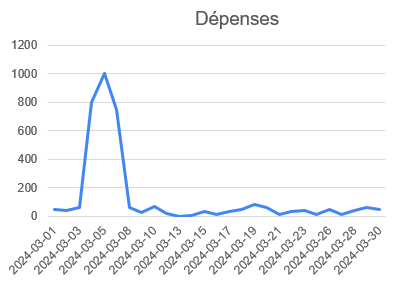

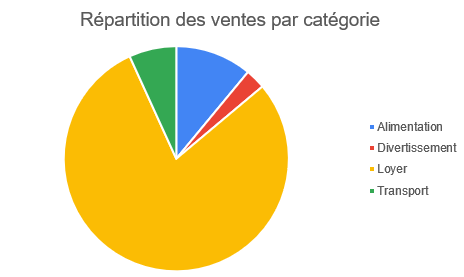

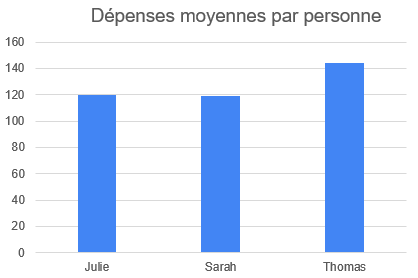

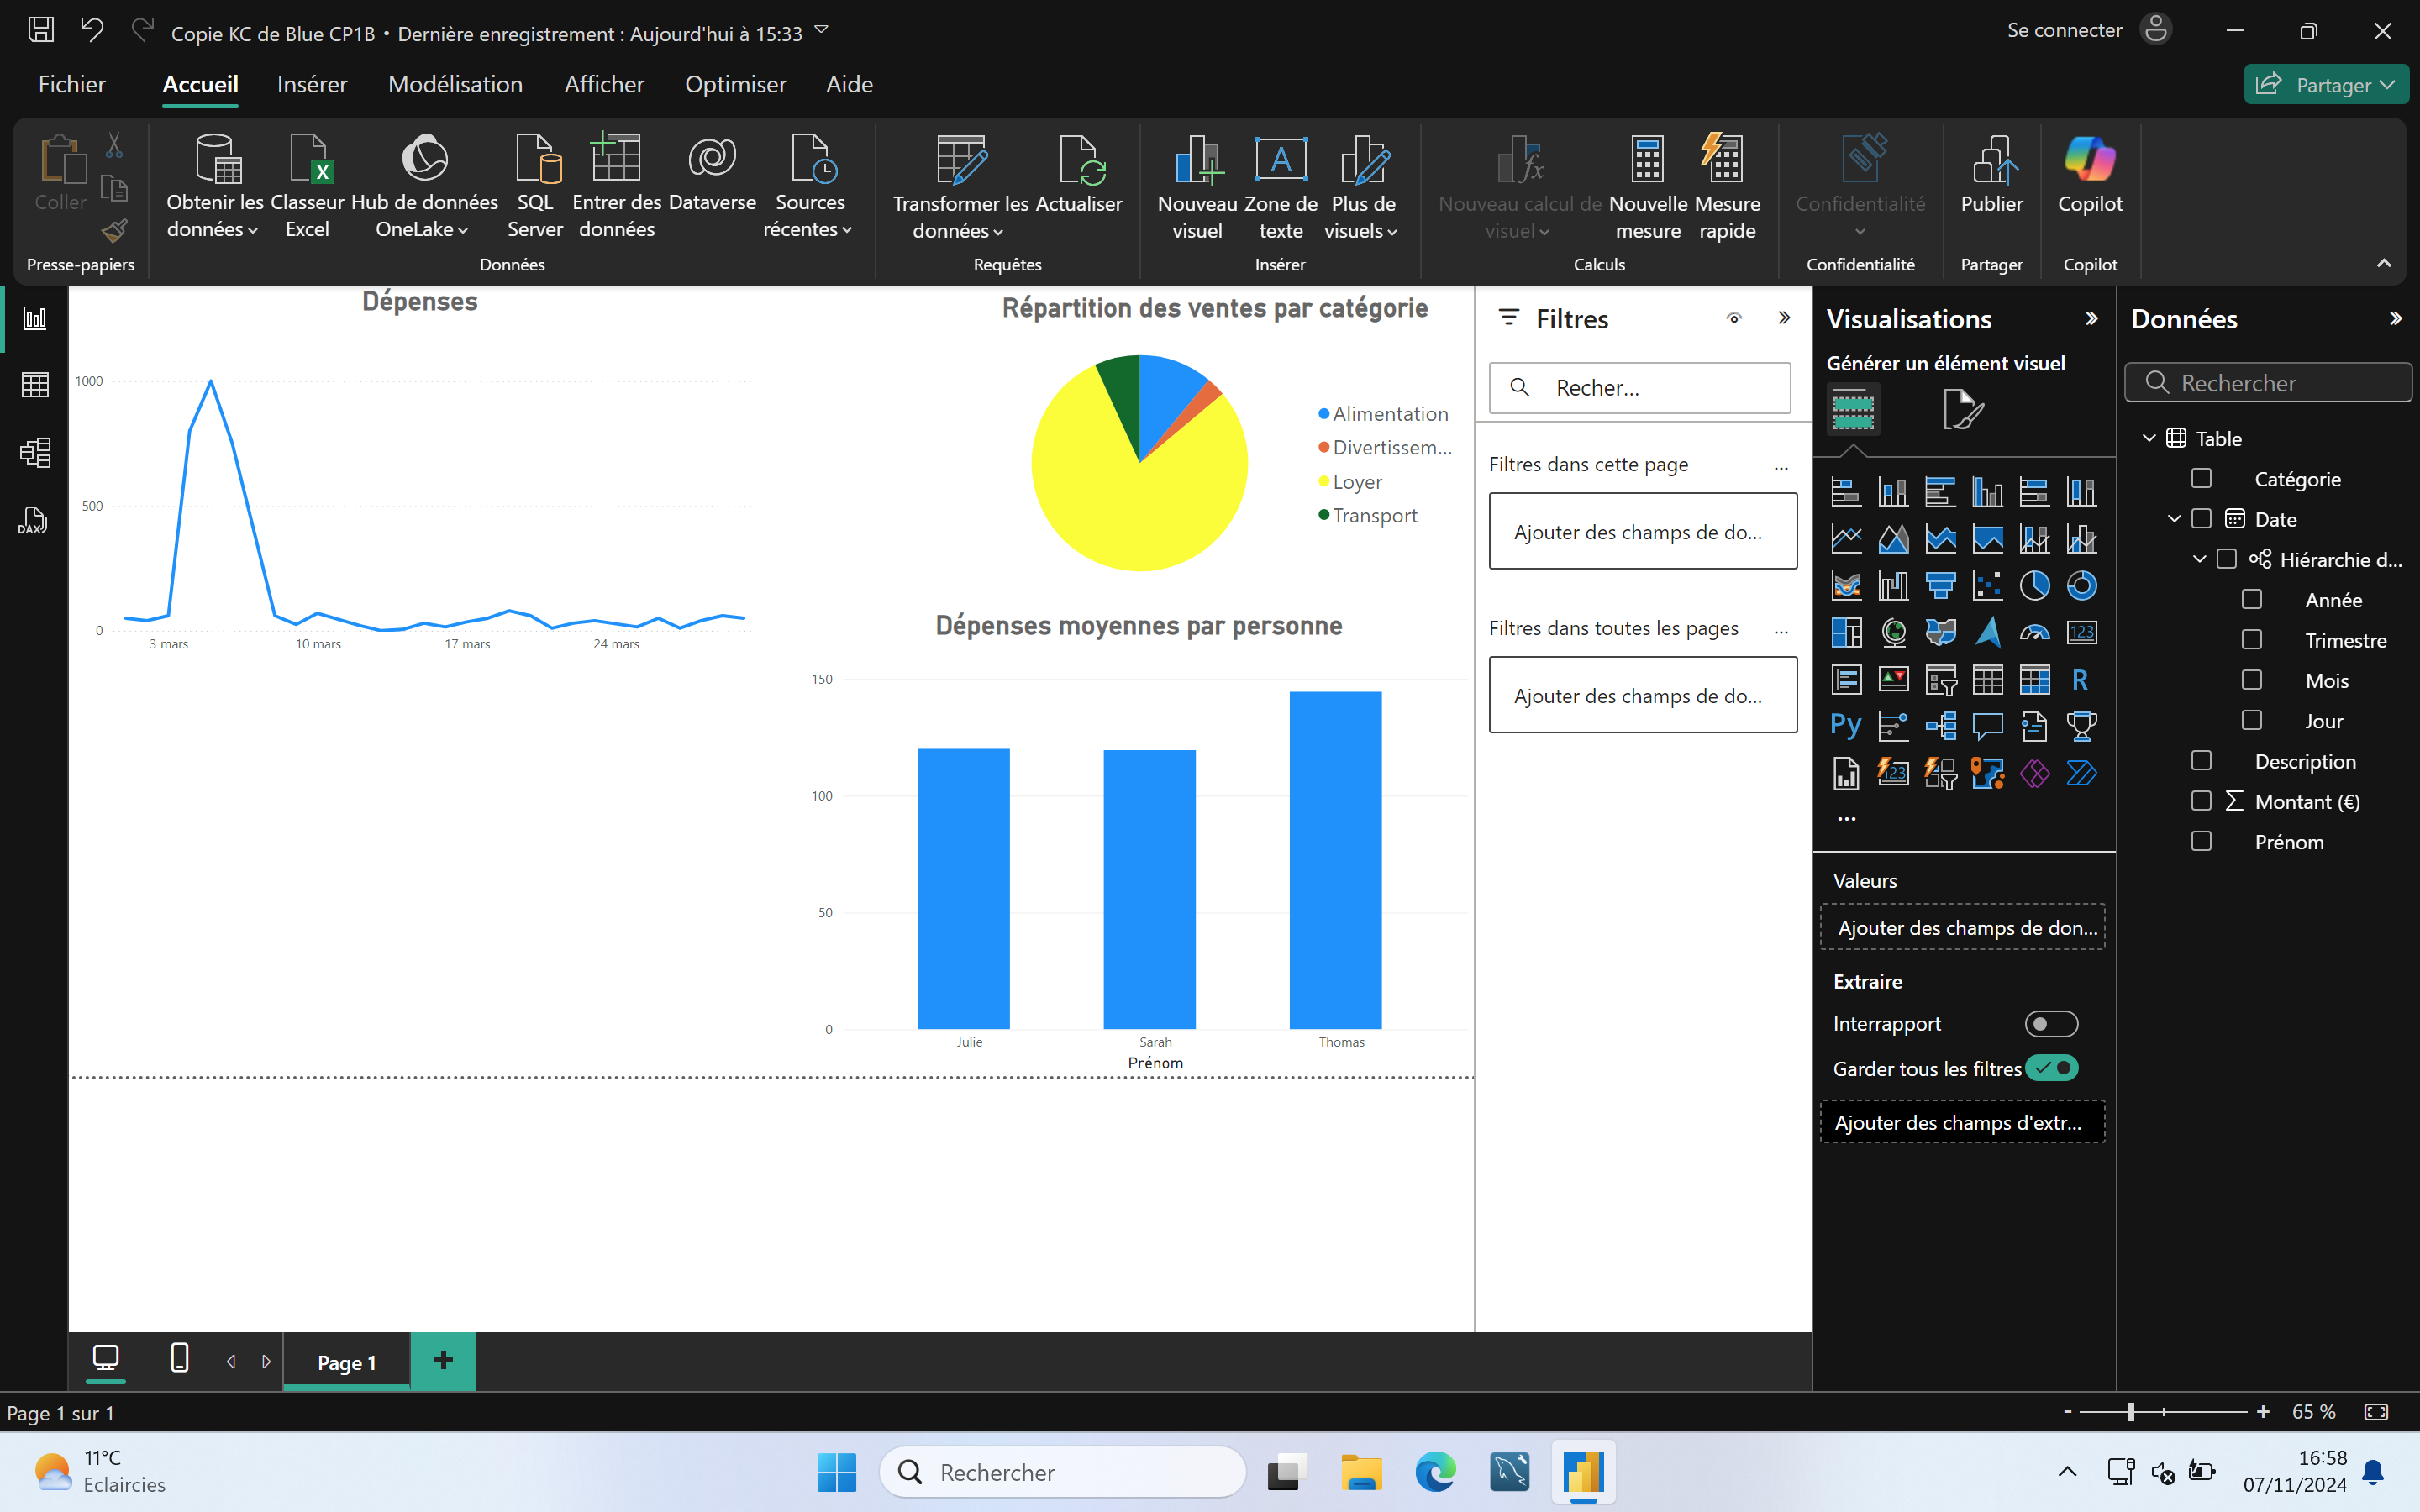

#Partie 3 - Python

## Python : Algo 1 - 10 min

Créer une fonction `analyser_notes` qui, en sortie, affichera la meilleure note, la moins bonne et la moyenne (arrondie à 2 chiffres après la virgules si jamais).

Exemple :

```python
analyser_notes([15, 12, 18, 10])
```

Retournera :

```
La meilleure note est : 18
La moins bonne est : 10
La moyenne des notes est : 13.75
```

In [97]:
#Écrivez votre script ici

def analyser_notes(notes):

    print(f'La meilleure note est : {max(notes)}')
    print(f'La moins bonne note est : {min(notes)}')
    print(f'La moyenne des notes est : {sum(notes)/len(notes)}')

analyser_notes([15, 12, 18, 10])

La meilleure note est : 18
La moins bonne note est : 10
La moyenne des notes est : 13.75


## Python : Algo 2 - 15 min

Créer une fonction `calculer_total` qui a pour spécificités :
- En entrée (le panier), la fonction prendra une liste de tuples contenant à chaque fois le prix d'un article, et sa quantité achetée

  Exemple : `[(15, 3),(10, 5),(25, 1)]` veut dire que dans notre panier nous avons
    - 3 articles à 15 euros
    - 5 articles à 10 euros
    - 1 article à 25 euros
- La fonction doit retourner le total de la commande
  
  **Mais si le total dépasse 100 euros, une remise de 10% est automatiquement appliquée**

Ainsi `calculer_total([(10,2), (25,1)])` renverra `45`

Tandis que  `calculer_total([(15, 3),(10, 5),(25, 1)])` renverra `108` (120-12)


In [100]:
#Écrivez votre script ici

def calculer_total(panier):
    total = 0
    for element in panier:
        total += element[0] * element[1]
    reduction = total * 0.1
    if total > 100 :
        total *= 0.9
    return round(total)

In [101]:
calculer_total([(10,2), (25,1)])

45

In [102]:
calculer_total([(15, 3),(10, 5),(25, 1)])

108

## Python : Algo 3 - 20 min

Un jeu de devinettes !

Créez un code qui :
- Génère un nombre aléatoire entre 1 et 100
- Demande à l'utilisateur de deviner ce nombre
- Indique si le nombre est trop grand/petit
- Redemande à l'utilisateur de deviner ne nombre

  Et ainsi de suite

- Mais qui limite le nombre d'essais
- Retourne le nombre d'essais utilisés ou -1 si perdu

In [114]:
#Écrivez votre script ici

import random

reponse = random.randint(0,100)
essai = 0
nb_essais = 0
tours = 3

for n in range(tours):
    if nb_essais < tours:
        essai = int(input('Entrez un nombre : '))
        if essai > reponse:
            print('Le nombre à trouver est plus petit.')
            nb_essais += 1
        elif essai < reponse:
            print('Le nombre à trouver est plus grand.')
            nb_essais += 1
        elif essai == reponse:
            nb_essais += 1
            print(f'Vous avez trouvé en {nb_essais} essais.')
            break

if nb_essais == tours:
    print('Perdu')

Entrez un nombre : 25
Le nombre à trouver est plus grand.
Entrez un nombre : 15
Le nombre à trouver est plus grand.
Entrez un nombre : 75
Le nombre à trouver est plus grand.
Perdu


## Python : BONUS

Une école primaire organise un jeu de maths.
Chaque participant commence avec un total de 10 points.
Il reçoit ensuite une série de 10 questions de difficulté croissante.
- S'il répond correctement à une question, il gagne des points selon son numéro (ex: bonne réponse à la question 3 = +3 pts)  
- S'il répond faux à une question, il perd des points selon la position de la réponse fausse (-2 pts si erreur à la question 2, -5 pts si à la question 5, etc...)
- En cas de réponse fausse, la question suivante ne rapportent plus de points
- Un participant ne peut pas avoir un score négatif. Son score minimal est 0.


Ecrivez une fonction `calcul_score(reponses)` qui reçoit en paramètre une chaîne contenant la série des 10 réponses d'un participant (avec "V" pour une réponse vraie et "F" pour une réponse fausse) et qui affiche son score final.

Si la chaîne contient autre chose que 10 caractères "V" ou "F", la fonction retournera -1.

Exemples:

    calcul_score("VVVVVVVVVV")
    65
    calcul_score("VVVVFVVFVV")
    24
    calcul_score("FFFFFFFFFF")
    0
    calcul_score("VVFFVVFV")
    5

In [120]:
def calcul_score(resultat):
  valide = ['V', 'F']
  erreur = 0
  for element in resultat:
      if element not in valide:
        erreur += 1

  if erreur > 0 or len(resultat) != 10:
    return 'Entrée invalide'

  score = 10
  precedent = 'V'
  for n in range(len(resultat)):
    if resultat[n] == 'V' and precedent == 'V':
      score += n+1
    elif resultat[n] == 'V' and precedent == 'F':
      score += 0
    elif resultat[n] == 'F':
      score -= (n+1)
    precedent = resultat[n]
  if score < 0:
    score = 0
  return score